### Finding Common Charges

The goal of this exercise is to find the most common charges seen when the beam is on. 

This will involve: 
1. pulling data from the accelerator during beam time for the PV "TORO:GUNB:360:CHRG"
2. identify clusters with an algorithm
3. plot bar chart of clusters with pC as the y-axis

### Cluster finding algorithm ###
- sort all charge values
- start with first value and calculate the tolerance amount 
- for each following value, check if it's within the tolerance amount. If it is, add to a cluster list. If not, create a new list, add it to that, and let it be the new comparison. 
- repeat the previous step with this new comparison point
- repeat until all datapoints have been emptied from the dataset

In [26]:
def cluster(vals, tolerance) -> list: 
    vals.sort()
    
    clusters = [[]]
    cluster_index = 0
    while len(vals) > 0:
        comparison = vals.pop(0)
        clusters[cluster_index].append(comparison)
        for i in range(len(vals)):
            next_val = vals.pop(0)
            if abs(next_val - comparison) <= (tolerance * comparison):  # if next_val is within 50% of comparison's value
                clusters[cluster_index].append(next_val)  # add next_val to cluster
            else:
                cluster_index += 1
                clusters.append([])  # add a new empty list
                clusters[cluster_index].append(next_val)  # add next_val to the next cluster
                break
    
    return clusters

In [27]:
# cluster algorithm demo
vals_unsorted = [1, 1.2, 1.3, 1.1, 1.2, 3.2, 3.5, 3.3, 2, 2.1]
val_tolerance = 0.5
cluster(vals_unsorted, val_tolerance)

[[1, 1.1, 1.2, 1.2, 1.3], [2, 2.1], [3.2, 3.3, 3.5]]

In [28]:
# pull TORO:GUNB:360:CHRG data from the accelerator and convert to a list of charges

# imports
import sys
sys.path.append('/Users/jonathontordilla/Desktop/hombom24/archive-analysis/lcls-tools-plots/lcls_tools') # path to tools 
import common.data_analysis.archiver as arch # type: ignore
from datetime import datetime
# specify timeframe with a datetime object
start_date = "2024/07/02 14:42:36"
end_date = "2024/07/02 15:42:36" 
format_string = "%Y/%m/%d %H:%M:%S"
start_date_obj = datetime.strptime(start_date, format_string)
end_date_obj = datetime.strptime(end_date, format_string)
# submit request with a list of PVs
data = arch.get_values_over_time_range(["TORO:GUNB:360:CHRG"], start_date_obj, end_date_obj)
soln_dict = data["SOLN:GUNB:100:BACT"]
soln_values = soln_dict.values # list 
print(soln_values)

[]


In [29]:
# cluster and print charge data
charge_tolerance = 0.05
charge_clusters = cluster(soln_values, charge_tolerance)
print(charge_clusters)

[[]]


/opt/anaconda3/envs/jonathon-lcls/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/anaconda3/envs/jonathon-lcls/lib/python3.12/site-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/var/folders/cq/8dkx5q294xz7cqz20lrdpqj80000gn/T/ipykernel_43528/1505834549.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(title='Charge values')


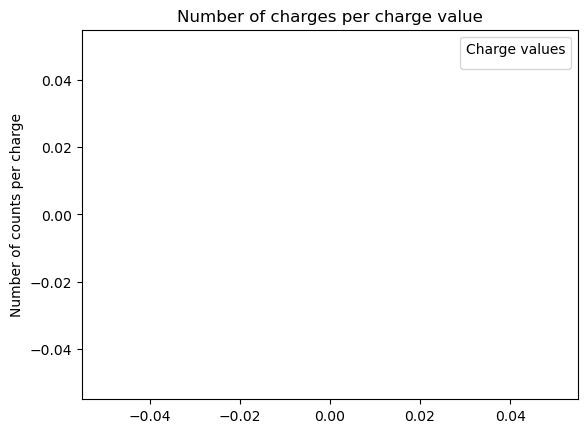

In [31]:
# plot a bar chart of clusters
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots()
values = [float(np.mean(charge_clusters[i])) for i in range(len(charge_clusters))] # list of average cluster values
counts = [len(charge_clusters[i]) for i in range(len(charge_clusters))]
ax.bar(values, counts)
ax.set_ylabel('Number of counts per charge')
ax.set_title('Number of charges per charge value')
ax.legend(title='Charge values')
plt.show()